In [29]:
import os
try:
    print(file_path)
except:
    file_path = os.path.abspath('')
    os.chdir(os.path.dirname(file_path))
    print(file_path)

/root/code_Bao/data-drift-detector/examples


# Data Drift Detector

Data Drift Detector provides some quick methods to detect data drift. This may be commonly needed to identify if a live machine learning model's performance have dipped due to data drift in the production environment. These methods include calculating the distribution distances, plotting of graphs, and comparing the ML efficacy of the 2 datasets.

This notebook will demonstrate the usage of the data drift detector package.

Let's use the boston dataset for this example, and split it equally into 2 to simulate prior and post datasets.

In [30]:
import numpy as np
import pandas as pd
import json
from sklearn.datasets import load_diabetes
from data_drift_detector import DataDriftDetector

In [31]:
import sys
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.addHandler(logging.StreamHandler(sys.stdout))

In [32]:
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)
df['CHAS']  = np.random.randint(1, 6, size=len(df)) # create fake category column
df.head()

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  CHAS  
0 -0.002592  0.019907 -0.017646   151.0     2  
1 -0.039493 -0.068332 -0.092204    75.0     5  
2 -0.002592  0.002861 -0.025930   141.0     4  
3  0.034309  0.022688 -0.009362   206.0     5  
4 -0.002592 -0.031988 -0.046641   135.0     4

In [33]:
# split the data set
split_ = int(len(df)/2)
df_prior = df.iloc[:split_]
df_post = df.iloc[split_:]

Initialize the detector

In [34]:
cat_columns = ['CHAS']
numeric_columns=[c for c in df.columns 
                if c not in cat_columns]
detector = DataDriftDetector(df_prior=df_prior,
                            df_post=df_post,
                            categorical_columns=cat_columns,
                            numeric_columns=numeric_columns)

`.calculate_drift()` returns a dictionary containing the column name and the corresponding statistics between the respective column in the prior and post dataframe. For each column, the jensen shannon distance and the wasserstein distance is calculated, along with a statistical test for similarity. High distances suggest greater data drift. Low p values suggest a significant difference in distribution.

In [35]:
# calculate jensen shannon distance between each column of the 2 data sets
print(json.dumps(detector.calculate_drift(), indent=4))

{
    "categorical": {
        "CHAS": {
            "chi_square_test_statistic": 9.544935431799837,
            "chi_square_test_p_value": 0.0488320682139392,
            "kl_divergence_post_given_prior": 0.02172887158245316,
            "kl_divergence_prior_given_post": 0.022145950399258943,
            "jensen_shannon_distance": 0.07393356792435589,
            "wasserstein_distance": 0.016289592760181
        }
    },
    "numerical": {
        "age": {
            "ks_2sample_test_statistic": 0.16,
            "ks_2sample_test_p_value": 0.1548386665118475,
            "jensen_shannon_distance": 0.06786036225010535,
            "wasserstein_distance": 0.0008626574628176725
        },
        "sex": {
            "ks_2sample_test_statistic": 0.07,
            "ks_2sample_test_p_value": 0.9684099261397212,
            "jensen_shannon_distance": 0.028831354643951496,
            "wasserstein_distance": 0.0003012432842448549
        },
        "bmi": {
            "ks_2sample_test_stat

Let's look at the difference by way of a plot.

Plotting the following numeric column(s): age, sex, bmi, bp, s1, s2, s3, s4, s5, s6, target
Plotting the following numeric column(s): age, sex, bmi, bp, s1, s2, s3, s4, s5, s6, target
Plotting the following numeric column(s): age, sex, bmi, bp, s1, s2, s3, s4, s5, s6, target
Plotting the following numeric column(s): age, sex, bmi, bp, s1, s2, s3, s4, s5, s6, target


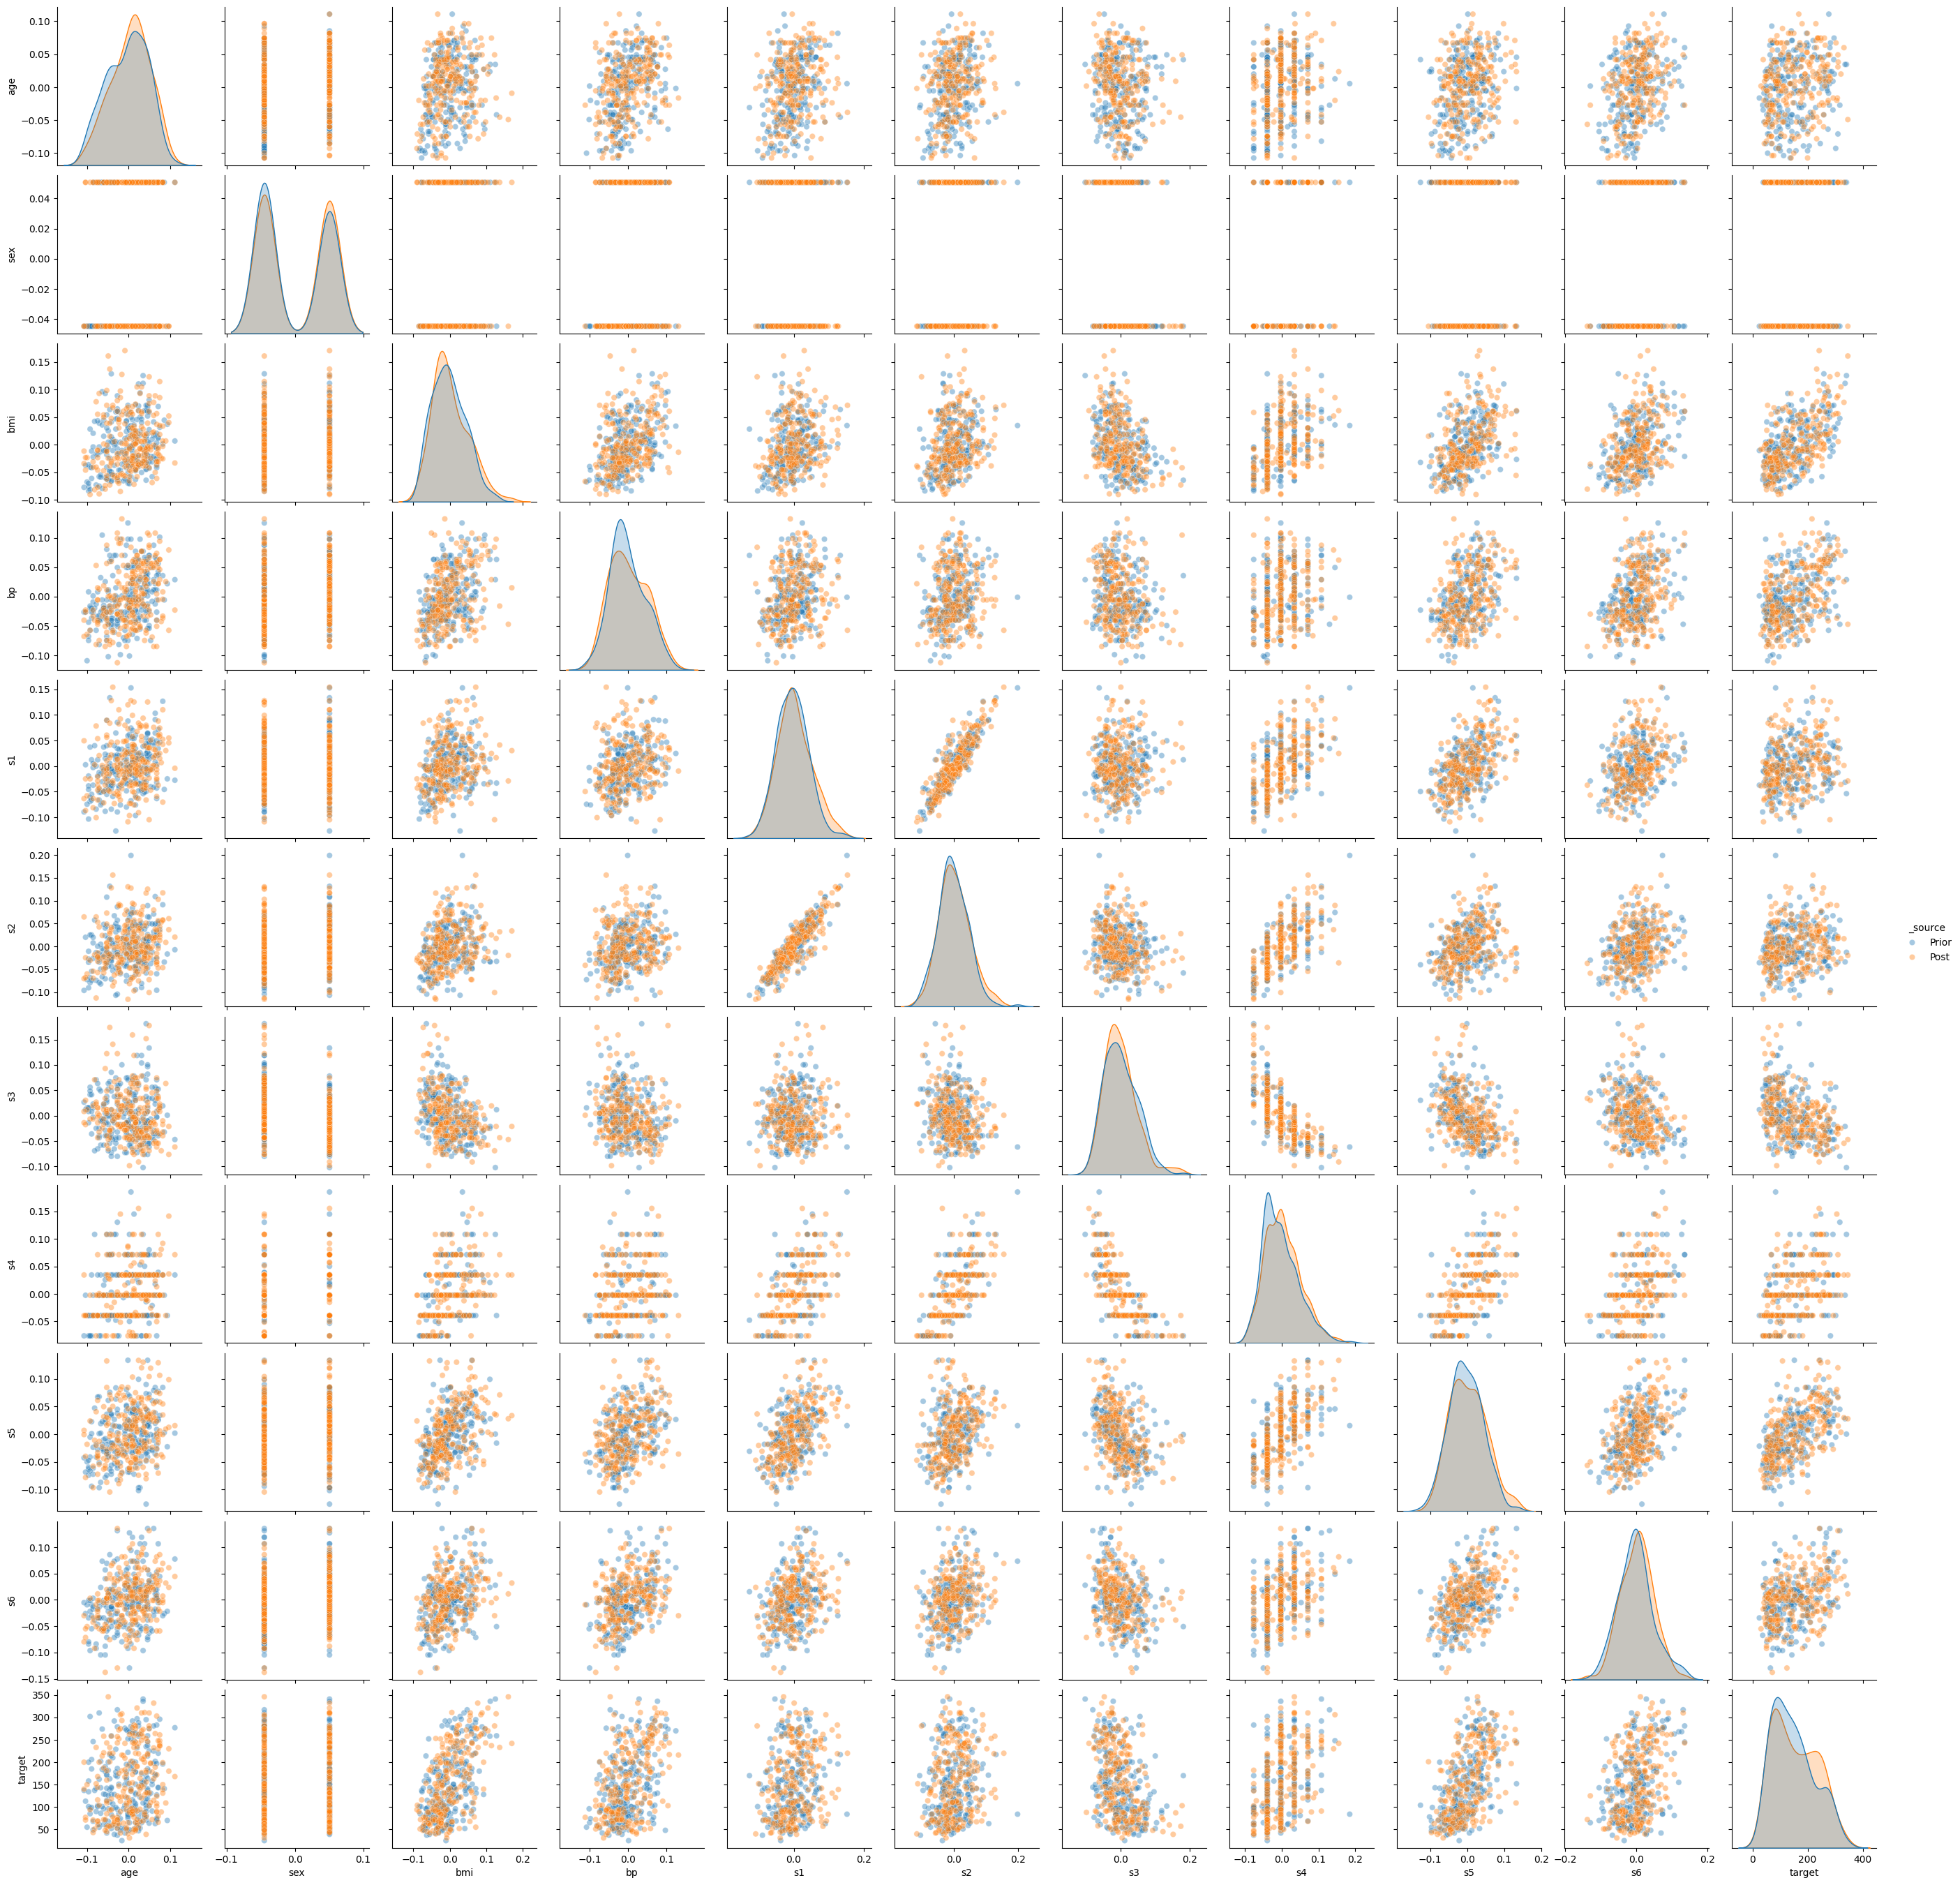

In [36]:
# plot numeric columns against each other in a pair grid
detector.plot_numeric_to_numeric(
    plot_kws={'alpha': 0.4},
    diag_kws={'common_norm': False},
    plot_numeric_columns=numeric_columns
)

We can see that the difference between `CRIM`, `TAX`, and `RAD` indeed look a little different.

We may also explore plots for categorical columns vs numerical columns.

Plotting the following categorical column(s): CHAS
Against the following numeric column(s):age, sex, bmi, bp, s1, s2, s3, s4, s5, s6, target
Categorical columns with high cardinality (>20 unique values) are not plotted.
Plotting the following categorical column(s): CHAS
Against the following numeric column(s):age, sex, bmi, bp, s1, s2, s3, s4, s5, s6, target
Categorical columns with high cardinality (>20 unique values) are not plotted.
Plotting the following categorical column(s): CHAS
Against the following numeric column(s):age, sex, bmi, bp, s1, s2, s3, s4, s5, s6, target
Categorical columns with high cardinality (>20 unique values) are not plotted.
Plotting the following categorical column(s): CHAS
Against the following numeric column(s):age, sex, bmi, bp, s1, s2, s3, s4, s5, s6, target
Categorical columns with high cardinality (>20 unique values) are not plotted.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be p

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='area'` for the same effect.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='area'` for the same effect.
  func(x=x, y=y, **kwargs)


Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings 

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='area'` for the same effect.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='area'` for the same effect.
  func(x=x, y=y, **kwargs)


Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings 

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='area'` for the same effect.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='area'` for the same effect.
  func(x=x, y=y, **kwargs)


Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings 

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='area'` for the same effect.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='area'` for the same effect.
  func(x=x, y=y, **kwargs)


Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings 

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='area'` for the same effect.
  func(x=x, y=y, **kwargs)


Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings 

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='area'` for the same effect.
  func(x=x, y=y, **kwargs)


Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings 

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='area'` for the same effect.
  func(x=x, y=y, **kwargs)


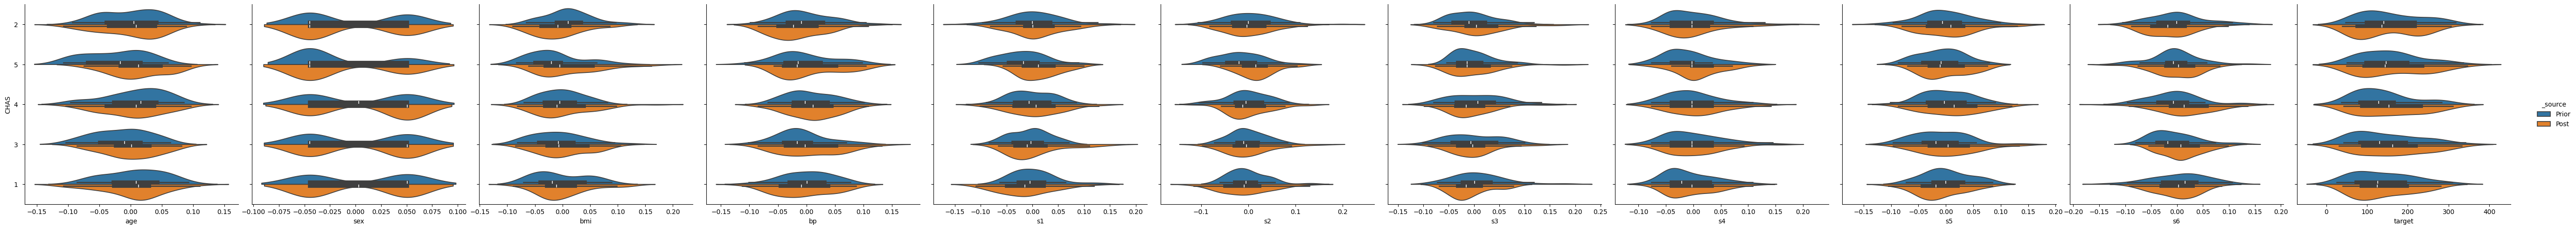

In [37]:
detector.plot_categorical_to_numeric(
    grid_kws={'height': 5},
    plot_kws={'scale': 'area'},
    plot_numeric_columns = numeric_columns
)

As well as categorical columns.

Plotting the following categorical column(s): CHAS
Plotting the following categorical column(s): CHAS
Plotting the following categorical column(s): CHAS
Plotting the following categorical column(s): CHAS
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a li

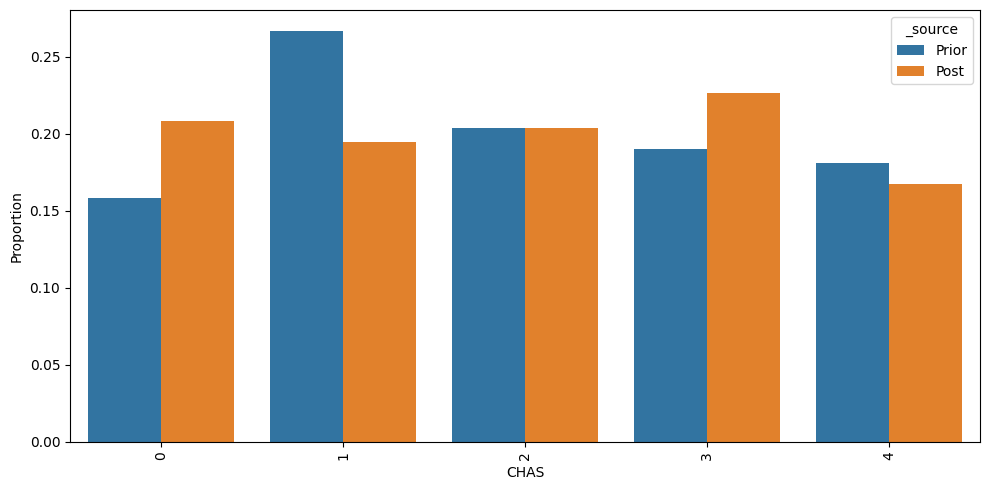

In [38]:
detector.plot_categorical()

Finally, you may compare the ML efficacy of the 2 datasets on a particular column

In [39]:
detector.compare_ml_efficacy(target_column='target')

No test data was provided. Test data will be created with a 70.0-30.0 shuffle split from the post data set.
No test data was provided. Test data will be created with a 70.0-30.0 shuffle split from the post data set.
No test data was provided. Test data will be created with a 70.0-30.0 shuffle split from the post data set.
No test data was provided. Test data will be created with a 70.0-30.0 shuffle split from the post data set.
One hot encoded columns: CHAS
One hot encoded columns: CHAS
One hot encoded columns: CHAS
One hot encoded columns: CHAS


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(

A RandomForestRegressor with a RandomizedSearchCV was trained.
The final model (trained with prior data) parameters are: {"n_estimators": 200, "max_samples": 0.6, "max_depth": 3}
The final model (trained with post data) parameters are: {"n_estimators": 200, "max_samples": 0.6, "max_depth": 4}
A RandomForestRegressor with a RandomizedSearchCV was trained.
The final model (trained with prior data) parameters are: {"n_estimators": 200, "max_samples": 0.6, "max_depth": 3}
The final model (trained with post data) parameters are: {"n_estimators": 200, "max_samples": 0.6, "max_depth": 4}
A RandomForestRegressor with a RandomizedSearchCV was trained.
The final model (trained with prior data) parameters are: {"n_estimators": 200, "max_samples": 0.6, "max_depth": 3}
The final model (trained with post data) parameters are: {"n_estimators": 200, "max_samples": 0.6, "max_depth": 4}
A RandomForestRegressor with a RandomizedSearchCV was trained.
The final model (trained with prior data) parameters ar

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasatt

RMSE        MAE        R2
Prior  57.796969  44.367644  0.494795
Post   62.009398  48.032459  0.418470

The prior dataset performed noticeably worse (R2 of 0.64 vs 0.81) than the post data set, which may suggest that an existing model (if any) built with the prior dataset is not performing well on the post data set, and that it may improve from some re-training.